In [1]:
# takes <30s. Uses <1GB of memory.
# perform experiments using results of training on pair summaries.

# next steps:
# more experiments with trained data.

# previous steps:
# acbl_pair_summaries.ipynb created pair_summaries_cleaned.pkl
# pair_summaries_train_experiments.ipynb trains pair summaries

# todo:
# explore use of strat*
# explore use of correlations -- cor()
# explore results from merging pair summary data with pair's board results.
# rename variables
# rename filenames

In [2]:
import pandas as pd
import pathlib
import pickle
import re
from collections import defaultdict
from IPython.display import display # needed to define display() method in vscode
import mlBridgeLib

In [3]:
# override pandas display options
mlBridgeLib.pd_options_display()

In [4]:
rootPath = pathlib.Path('e:/bridge/data')
acblPath = rootPath.joinpath('acbl')
savedModelsPath = acblPath.joinpath('SavedModels')
# create parent directories in case they don't already exist.
savedModelsPath.mkdir(parents=True, exist_ok=True)

In [5]:
# takes 10s
# load trained model
latest_model_file = savedModelsPath.joinpath('LatestModel.pkl')
print(f"Loading trained model: {latest_model_file}")
with open(latest_model_file, 'rb') as f:
    latest_model = pickle.load(f)
dep_var, trainx, trainy, validx, validy, m, predictionsEmbedded, probabilities, predictionsCoefficientsdf, max_iter, hidden_layer_sizes = latest_model.values()

Loading trained model: e:\bridge\data\acbl\SavedModels\LatestModel.pkl


In [6]:
probabilities.shape, len(probabilities), len(validx)

((80061,), 80061, 80061)

In [7]:
#assert probabilities.shape == (len(validx), 14)

In [8]:
m, predictionsEmbedded, probabilities, predictionsCoefficientsdf

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('number',
                                                   Pipeline(steps=[('number',
                                                                    StandardScaler())]),
                                                   ['club_class',
                                                    'club_id_number',
                                                    'mp_total_x', 'mp_total_y',
                                                    'pair_summary_id', 'rating',
                                                    'strat', 'winner_type',
                                                    'SumMP', 'GeoMP',
                                                    'pair_count', 'pair_mean',
                                                    'pair_std']),
                                                  ('string',
                                                   Pipeline(steps=[('string',
           

In [9]:
predictionsCoefficientsdf

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std
0,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00
1,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
2,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
3,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
4,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
5,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
6,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
7,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
8,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
9,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00


In [10]:
[p for p in predictionsEmbedded]

[0.5603249439039648,
 0.5588732225151799,
 0.5597154155579348,
 0.5628494061961642,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5594870973105005,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5603249439874148,
 0.5597154068495702,
 0.5628494002442105,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5603249376625484,
 0.5597151843215543,
 0.5588732236902112,
 0.5603247091633209,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5628494057744995,
 0.5561209620124993,
 0.5597154110758984,
 0.5561209620124993,
 0.5561209620124993,
 0.5610232385223562,
 0.5561209620124993,
 0.5582097814291859,
 0.558535180827822,
 0.5573274504213669,
 0.5585971969246688,
 0.5561975980218489,
 0.5561209620124993,
 0.5561209620124993,
 0.5561209620124993,
 0.5579201774608407,
 0.5568480849784186,
 0.5601820137652576,
 0.5565655561396462,
 0.55956280712

In [11]:
[round(p,2) for p in probabilities]

[0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.58,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.58,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,
 0.56,

In [12]:
validx

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std
377,,,,,4,100040,NS,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,260.34,222.13,5782772,Michael Anthony,Denise Anthony(swap names),1271903,3337391,1,A,2,AVERAGE,1,1271903_3337391,482.47,57829.32,24,0.56,0.05
378,,,,,4,100040,NS,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,1050.02,1200.27,5782774,Robert Miller,Connie Sayler(swap names),2433087,7892748,1,A,1,AVERAGE,1,2433087_7892748,2250.29,1260307.50,34,0.55,0.05
379,,,,,4,100040,NS,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,1103.91,762.09,5782764,Michael Petrescu,David McWalter(swap names),2373424,2779099,1,A,1,AVERAGE,1,2373424_2779099,1866.00,841278.81,12,0.58,0.04
380,,,,,4,100040,NS,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,24.90,35.39,5782770,Victoria Handford,Dan Scarffe,1407929,1407937,1,A,3,AVERAGE,1,1407929_1407937,60.29,881.21,28,0.54,0.05
381,,,,,4,100040,EW,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,907.08,673.39,5782763,James Scarfe,Kirk Rustad,3449335,6451748,1,A,2,AVERAGE,1,3449335_6451748,1580.47,610818.62,32,0.58,0.06
382,,,,,4,100040,EW,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,58.24,78.52,5782767,Vickie Roche,Stan Marinoske(swap names),7846509,9059474,1,A,3,AVERAGE,1,7846509_9059474,136.76,4573.00,53,0.56,0.06
383,,,,,4,100040,EW,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,1193.82,1068.91,5782775,John Perry,Julie Perry,4029062,6694985,1,A,1,AVERAGE,1,4029062_6694985,2262.73,1276086.12,25,0.57,0.06
384,,,,,4,100040,EW,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,1722.40,1881.97,5782769,Anne Kendall,Robert Coole(swap names),1872419,1872427,1,A,1,AVERAGE,1,1872419_1872427,3604.37,3241505.00,77,0.57,0.04
385,,,,,4,100040,EW,#20898 Pairs Unit 456 21 Boards,PAIRS,2021-06-02 00:00:00,382.68,840.97,5782771,Ben Levine,Nicholas Buck(swap names),6996043,8760780,1,A,2,AVERAGE,1,6996043_8760780,1223.65,321822.38,10,0.56,0.04
386,,,,,4,100040,NS,#96730 Pairs Unit 456 21 Boards,PAIRS,2021-06-09 00:00:00,912.18,677.29,5844340,James Scarfe,Kirk Rustad,3449335,6451748,1,A,2,AVERAGE,1,3449335_6451748,1589.47,617810.38,32,0.58,0.06


In [13]:
# using string to avoid lost of precision creep.
trainy_vc = trainy.round(2).astype('string').value_counts(normalize=True)
trainy_vc

0.54   0.08
0.56   0.08
0.53   0.07
0.55   0.07
0.52   0.07
0.57   0.06
0.58   0.06
0.51   0.06
0.59   0.05
0.6    0.05
0.5    0.04
0.61   0.04
0.62   0.04
0.49   0.03
0.63   0.03
0.48   0.02
0.64   0.02
0.65   0.02
0.47   0.02
0.66   0.01
0.46   0.01
0.67   0.01
0.68   0.01
0.45   0.01
0.69   0.01
       ... 
0.37   0.00
0.36   0.00
0.79   0.00
0.8    0.00
0.35   0.00
0.81   0.00
0.34   0.00
0.33   0.00
0.82   0.00
0.83   0.00
0.32   0.00
0.85   0.00
0.31   0.00
0.0    0.00
0.86   0.00
0.84   0.00
0.3    0.00
0.88   0.00
0.89   0.00
0.25   0.00
0.29   0.00
0.9    0.00
0.87   0.00
0.24   0.00
0.28   0.00
Name: percentage, Length: 66, dtype: Float64

<AxesSubplot:>

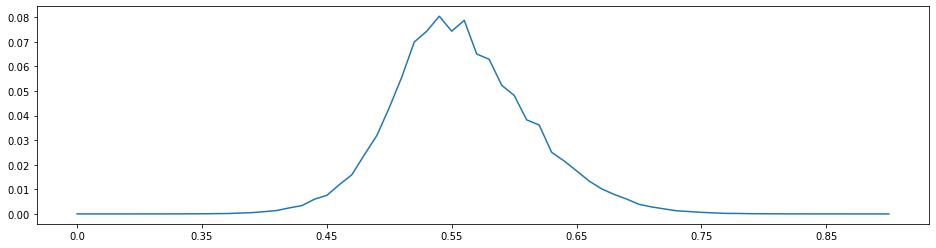

In [14]:
trainy_vc.sort_index().plot(figsize=(16,4))

In [15]:
# using string to avoid lost of precision creep.
validy_vc = validy.round(2).astype('string').value_counts(normalize=True)
validy_vc

0.56   0.08
0.54   0.08
0.53   0.07
0.55   0.07
0.52   0.07
0.57   0.06
0.58   0.06
0.51   0.06
0.59   0.05
0.6    0.05
0.5    0.04
0.61   0.04
0.62   0.04
0.49   0.03
0.63   0.02
0.48   0.02
0.64   0.02
0.65   0.02
0.47   0.02
0.66   0.01
0.46   0.01
0.67   0.01
0.68   0.01
0.45   0.01
0.69   0.01
       ... 
0.73   0.00
0.74   0.00
0.4    0.00
0.39   0.00
0.75   0.00
0.76   0.00
0.38   0.00
0.77   0.00
0.78   0.00
0.37   0.00
0.36   0.00
0.79   0.00
0.35   0.00
0.31   0.00
0.81   0.00
0.82   0.00
0.83   0.00
0.34   0.00
0.8    0.00
0.85   0.00
0.32   0.00
0.86   0.00
0.3    0.00
0.29   0.00
0.84   0.00
Name: percentage, Length: 57, dtype: Float64

<AxesSubplot:>

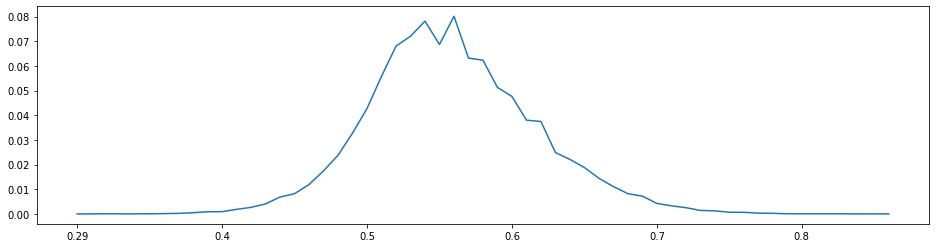

In [16]:
validy_vc.sort_index().plot(figsize=(16,4))

<AxesSubplot:>

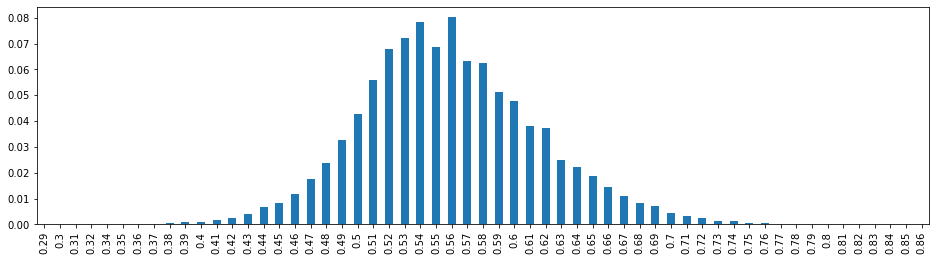

In [17]:
validy_vc.sort_index().plot(kind='bar',figsize=(16,4))

In [18]:
pred_df = pd.Series(predictionsEmbedded,index=validx.index,name='Pred_'+dep_var)
apdf = pd.concat([validx,validy,pred_df],axis=1)
apdf.sort_values('Pred_'+dep_var,ascending=False,inplace=True)
apdf

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage,Pred_percentage
1141170,99.0,67.12000274658203,45.0,195,4,240317,NS,Wednesday Afternoon Pairs,PAIRS,2021-06-02 00:00:00,7334.70,2652.16,5778540,"Molt, Joanne","Whitehouse, David(swap names)",3174379,4196058,20,A,1,HIGHEST,2,3174379_4196058,9986.86,19452798.00,7,0.65,0.06,0.66,0.60
968695,131.0,66.16999816894531,93.0,137,4,230144,EW,Tuesday Morning Pairs,PAIRS,2021-06-01 00:00:00,20023.70,7797.28,5767712,"Hirschman, Martin","Katz, Robert",1925369,8003475,2,A,1,AVERAGE,2,1925369_8003475,27820.98,156130384.00,7,0.60,0.03,0.66,0.60
1467951,155.0,66.44000244140625,81.0,174,4,259903,NS,Friday Morning Pairs,PAIRS,2021-06-18 00:00:00,2850.73,5504.51,5924155,"Erkoc, Timucin","Laird, L",4793730,5572606,4,A,1,AVERAGE,2,4793730_5572606,8355.24,15691871.00,44,0.61,0.05,0.58,0.60
1467944,155.0,66.44000244140625,81.0,174,4,259903,NS,Friday Morning Pairs,PAIRS,2021-06-11 00:00:00,2850.73,5504.51,5863117,"Erkoc, Timucin","Laird, L(swap names)",4793730,5572606,20,B,1,HIGHEST,2,4793730_5572606,8355.24,15691871.00,44,0.61,0.05,0.59,0.60
1467928,155.0,66.44000244140625,81.0,174,4,259903,NS,Friday Morning Pairs,PAIRS,2021-06-04 00:00:00,2850.73,5504.51,5811671,"Erkoc, Timucin","Laird, L",4793730,5572606,2,B,1,AVERAGE,2,4793730_5572606,8355.24,15691871.00,44,0.61,0.05,0.57,0.60
1892635,155.0,66.44000244140625,81.0,174,4,271239,NS,Saturday Afternoon Pairs,PAIRS,2021-06-26 00:00:00,2850.73,1858.27,5993318,"Erkoc, Timucin","Lanier, Carolyn",4793730,8856419,20,A,1,HIGHEST,2,4793730_8856419,4709.00,5297426.00,49,0.57,0.05,0.58,0.60
1518207,34.0,66.7699966430664,58.0,506,4,261164,NS,#35717 PIPS - OPEN - 20 Boards,PAIRS,2021-06-17 00:00:00,3100.77,9747.72,5912382,Robin Roche,Steven Smolen,1465120,9627774,1,A,1,AVERAGE,2,1465120_9627774,12848.49,30225438.00,51,0.59,0.05,0.56,0.60
1044102,34.0,66.7699966430664,58.0,506,4,235408,NS,#25397 QuickTricks 6:45 Open Pairs,PAIRS,2021-06-21 00:00:00,3100.77,9747.72,5950849,Robin Roche,Steven Smolen,1465120,9627774,1,A,1,AVERAGE,2,1465120_9627774,12848.49,30225438.00,51,0.59,0.05,0.72,0.60
1044092,34.0,66.7699966430664,58.0,506,4,235408,EW,#75488 QuickTricks 6:45 Open NAP Qualifier,PAIRS,2021-06-14 00:00:00,3100.77,9747.72,5884428,Robin Roche,Steven Smolen,1465120,9627774,74,A,1,AVERAGE,2,1465120_9627774,12848.49,30225438.00,51,0.59,0.05,0.56,0.60
980591,201.0,71.0199966430664,5.0,538,4,231225,NS,Wednesday Aft Open Pairs,PAIRS,2021-06-23 00:00:00,62119.34,4906.23,5970468,"Itabashi, Mark","Brooke, Joan",6811434,7972873,20,A,1,HIGHEST,2,6811434_7972873,67025.57,304771776.00,11,0.64,0.08,0.71,0.60


<AxesSubplot:>

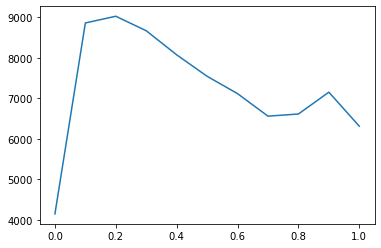

In [19]:
# using scipy
import scipy
apdf['Prob_'+dep_var] = apdf.apply(lambda r: scipy.stats.norm.cdf(r['percentage'],r['pair_mean'],r['pair_std']),axis='columns')
apdf['Prob_'+dep_var].round(1).value_counts().sort_index().plot()

<AxesSubplot:>

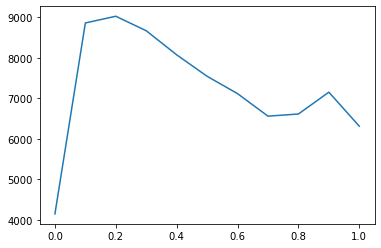

In [20]:
#  using 0.5 * (1 + math.erf((x - mean)/math.sqrt(2 * standard_dev**2)))
import math
apdf['Prob_'+dep_var] = apdf.apply(lambda r: 0.5 * (1 + math.erf((r['percentage'] - r['pair_mean'])/math.sqrt(2 * r['pair_std']**2))),axis='columns')
apdf['Prob_'+dep_var].round(1).value_counts().sort_index().plot()

In [21]:
apdf['Actual_Pred_Diff_'+dep_var] = (apdf[dep_var]-apdf['Pred_'+dep_var])
diff_vc = apdf['Actual_Pred_Diff_'+dep_var].round(2).value_counts(normalize=True)
diff_vc

-0.02   0.08
-0.01   0.08
-0.03   0.07
-0.00   0.07
0.01    0.07
-0.04   0.07
0.02    0.06
0.03    0.05
-0.05   0.05
0.04    0.05
-0.06   0.04
0.05    0.04
-0.07   0.03
0.06    0.03
0.07    0.03
-0.08   0.02
0.08    0.02
0.09    0.02
-0.09   0.02
0.10    0.01
-0.10   0.01
0.11    0.01
-0.11   0.01
0.12    0.01
0.13    0.01
        ... 
0.18    0.00
-0.16   0.00
0.19    0.00
-0.17   0.00
0.20    0.00
-0.18   0.00
0.21    0.00
0.22    0.00
-0.19   0.00
-0.20   0.00
0.24    0.00
0.26    0.00
0.23    0.00
-0.24   0.00
-0.22   0.00
0.28    0.00
0.29    0.00
0.25    0.00
-0.25   0.00
-0.21   0.00
0.27    0.00
-0.23   0.00
-0.27   0.00
0.30    0.00
-0.26   0.00
Name: Actual_Pred_Diff_percentage, Length: 58, dtype: float64

<AxesSubplot:>

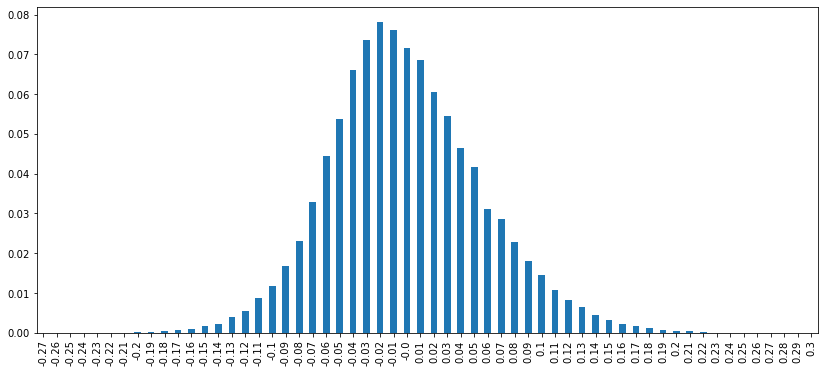

In [22]:
diff_vc.sort_index().plot(kind='bar',figsize=(14,6))

In [50]:
# cummulative probability distribution
ap_diff = apdf['Actual_Pred_Diff_'+dep_var]
for vv in range(10):
    v = round(vv/100+.01,2)
    b = ap_diff.ge(-v) & ap_diff.le(v)
    print('Cummulative prob:',v,len(apdf),ap_diff[b].count(),round(ap_diff[b].count()/len(apdf),2))

Cummulative prob: 0.01 80061 11587 0.14
Cummulative prob: 0.02 80061 23050 0.29
Cummulative prob: 0.03 80061 33661 0.42
Cummulative prob: 0.04 80061 43380 0.54
Cummulative prob: 0.05 80061 51627 0.64
Cummulative prob: 0.06 80061 58518 0.73
Cummulative prob: 0.07 80061 63982 0.8
Cummulative prob: 0.08 80061 68157 0.85
Cummulative prob: 0.09 80061 71427 0.89
Cummulative prob: 0.1 80061 73836 0.92


<AxesSubplot:>

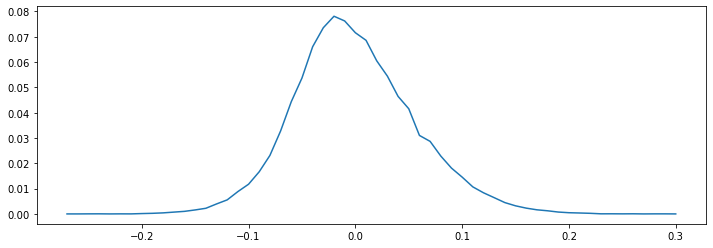

In [24]:
ap_diff.round(2).value_counts(normalize=True).sort_index().plot(figsize=(12,4))

<AxesSubplot:>

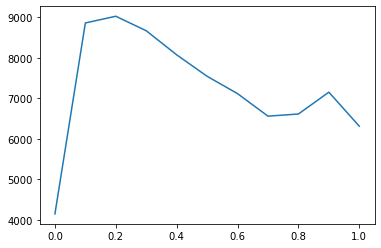

In [25]:
apdf['Prob_'+dep_var].round(1).value_counts().sort_index().plot()

In [54]:
# show columns which are correlated.
print(apdf.columns)
correlated_cols = apdf.columns #['percentage','SumMP','GeoMP','mp_total_x','mp_total_y','pair_count','pair_mean','pair_std']
apdf[correlated_cols].corr()['percentage'].sort_values()

Index(['bpr_games', 'bpr_pr', 'bpr_rank', 'bpr_unit', 'club_class',
       'club_id_number', 'direction', 'event_name', 'event_type', 'game_date',
       'mp_total_x', 'mp_total_y', 'pair_summary_id', 'player_name_x',
       'player_name_y', 'player_number_x', 'player_number_y', 'rating',
       'section_name', 'strat', 'stratification_type', 'winner_type',
       'pair_numbers', 'SumMP', 'GeoMP', 'pair_count', 'pair_mean', 'pair_std',
       'percentage', 'Pred_percentage', 'Prob_percentage',
       'Actual_Pred_Diff_percentage'],
      dtype='object')


strat                         -0.37
winner_type                   -0.03
club_class                    -0.01
rating                        -0.00
pair_summary_id               -0.00
club_id_number                 0.02
pair_std                       0.04
pair_count                     0.11
GeoMP                          0.12
Pred_percentage                0.14
mp_total_y                     0.18
mp_total_x                     0.19
SumMP                          0.21
pair_mean                      0.35
Prob_percentage                0.85
Actual_Pred_Diff_percentage    0.99
percentage                     1.00
Name: percentage, dtype: float64

In [28]:
show_cols = ['club_id_number','pair_summary_id','pair_numbers','player_name_x','player_name_y',dep_var,'Pred_'+dep_var,'Actual_Pred_Diff_'+dep_var,'Prob_'+dep_var,'pair_count','pair_mean','pair_std']

In [29]:
# top outperformers
apdf[show_cols].nlargest(100,'Prob_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
482703,148320,6029048,2129272_6224504,"Kooby, Dora","Meer, Rachel(swap names)",0.69,0.56,0.13,1.00,5,0.52,0.02
482696,148320,5912235,2129272_6224504,"Kooby, Dora","Meer, Rachel(swap names)",0.66,0.56,0.10,1.00,5,0.52,0.02
850100,221572,5979074,3363813_5207754,"Turner, Charlene","Willis, Carol(swap names)",0.69,0.56,0.13,1.00,5,0.50,0.01
497304,149328,5935392,1596462_2664712,Cornel Sawchuk,Marcia Taylor,0.79,0.56,0.24,1.00,19,0.54,0.03
622000,188573,5873470,3665208_7781180,Patricia Berry,Scott Humphrey(swap names),0.74,0.56,0.18,1.00,6,0.56,0.02
1637774,264143,5975601,5139325_6744605,C Koster,R Selby(swap names),0.62,0.56,0.06,1.00,5,0.53,0.01
661412,199026,6024423,6807011_8483353,"Dunn, Lois","Bash, Gail(swap names)",0.60,0.56,0.05,1.00,6,0.51,0.01
528455,157792,5930948,3300765_6751024,Ellen Brown,Sandra Hunt,0.67,0.56,0.12,1.00,5,0.53,0.02
925785,226415,5951163,5423805_9556281,"Guthrie, Nancy","Chang, Rubin(swap names)",0.62,0.56,0.06,1.00,6,0.52,0.01
514262,154971,5792696,6793118_9179488,Sandi White,Tai Eng(swap names),0.68,0.56,0.12,1.00,8,0.55,0.02


In [30]:
# top underperformers
apdf[show_cols].nsmallest(100,'Prob_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
486092,148395,5822291,4280067_6866107,Nicolette Keyzer,Janice Colangelo,0.36,0.56,-0.19,0.00,5,0.55,0.02
1718928,266502,6015044,2666367_3098389,Carol Stephens,Janet Carlson,0.31,0.56,-0.25,0.00,28,0.53,0.03
299817,130096,6004979,5265487_6133479,Kathy Turnbull,Suzan Blatt,0.36,0.56,-0.20,0.00,6,0.58,0.03
1575770,263541,5786699,2193701_3171388,"Weitzman, Sarah Brown","Langenthal, Howard",0.41,0.56,-0.15,0.00,7,0.51,0.01
2009010,274498,5886286,3813711_8009147,Laurie Squires,Gordon Squires(swap names),0.41,0.56,-0.15,0.00,5,0.51,0.01
865321,221739,5803555,3578143_9287515,Carroll Wood,Dale Thompson(swap names),0.46,0.56,-0.10,0.00,9,0.59,0.02
255341,127001,5848329,1935720_4319362,Elizabeth Harris,Steven Oreolt(swap names),0.44,0.56,-0.12,0.00,5,0.60,0.03
1170293,241794,5880029,5585597_7636504,Jacky Poulsen,Michael Calder,0.45,0.56,-0.11,0.00,5,0.57,0.02
2136816,901280,5959914,7551592_7779828,Michael Kravitz,Hank Jiles,0.50,0.56,-0.05,0.00,8,0.58,0.01
865258,221739,5789397,5090091_9302409,Fred Lay,Cathy Alford(swap names),0.37,0.56,-0.19,0.00,12,0.54,0.03


In [31]:
# top outperformers
apdf[show_cols].nlargest(100,'Actual_Pred_Diff_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
1573117,263475,5935652,4788486_8765723,Helen Newmark,Jill Randell(swap names),0.86,0.56,0.30,1.00,12,0.58,0.08
1996618,274233,5949418,6449174_9955321,Jian-Ping Chen,Charles Sadowski,0.85,0.56,0.29,1.00,31,0.60,0.05
1494458,260117,5850501,9145621_9145648,Richard Gilmore,Sandra Gilmore(swap names),0.85,0.56,0.29,1.00,27,0.55,0.06
417456,140111,5950741,3660443_4226364,Julie Guerard,Ramzi Fawaz(swap names),0.85,0.56,0.29,1.00,23,0.52,0.07
1711083,266064,5816697,1168606_4990714,Barry Sanders,Denise Lott,0.84,0.56,0.28,1.00,29,0.59,0.07
968806,230144,5835545,5642280_9684379,Douglas Sweeder,William Ahlstrom(swap names),0.83,0.56,0.28,1.00,36,0.55,0.04
865825,221739,5914490,6795773_7896875,Stephanie Rhodes Navarre,Marva Arceneaux,0.83,0.56,0.28,1.00,48,0.57,0.07
2136624,901280,5882678,3586510_9111174,Colleen Bossi,Ronald Bossi,0.83,0.56,0.27,1.00,53,0.59,0.06
1460285,259283,5815205,6382207_6644856,John Evans,Stephen Rattner(swap names),0.82,0.56,0.26,1.00,59,0.60,0.06
308596,130252,6089242,1640526_4149785,Tina Radding,Lina Clark(swap names),0.82,0.56,0.26,1.00,52,0.60,0.06


In [32]:
# top underperformers
apdf[show_cols].nsmallest(100,'Actual_Pred_Diff_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
448631,143255,5846886,3300226_4721705,Marcia Dravis,David Dravis,0.29,0.56,-0.27,0.00,64,0.54,0.05
2122686,277178,5905805,2289636_2289644,Jane Rosenblum,Bari Samson,0.30,0.56,-0.26,0.00,11,0.56,0.05
324896,131102,5937725,1883135_8379122,Joy Moore,Aissa Wayne,0.31,0.56,-0.25,0.00,36,0.54,0.05
1718928,266502,6015044,2666367_3098389,Carol Stephens,Janet Carlson,0.31,0.56,-0.25,0.00,28,0.53,0.03
115115,110601,5843241,7651880_8906491,Margaret Kirby,Linda Morris(swap names),0.31,0.56,-0.25,0.00,16,0.54,0.05
378858,135905,5796549,7807457_7809573,Marc Demyttenaere,Ruth Brady,0.31,0.56,-0.24,0.00,100,0.52,0.06
378859,135905,5796548,2292114_9114475,Carol Norman,Carol Cumming Speirs(swap names),0.31,0.56,-0.24,0.00,62,0.53,0.05
214783,125203,6053979,8710880_8821828,Cynthia Musser,Rachel Campbell(swap names),0.32,0.56,-0.24,0.00,22,0.50,0.05
214780,125203,6053980,7409893_9941851,Judith Graff,Ann Martin(swap names),0.32,0.56,-0.24,0.00,50,0.51,0.05
1284385,250829,5996980,2024063_2130637,Beverly Myers,Jon Myers,0.32,0.56,-0.23,0.00,26,0.50,0.05


In [33]:
apdf[apdf['club_id_number'] == 108571][show_cols].nlargest(100,'Actual_Pred_Diff_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
99919,108571,5975745,4743555_7487231,Wendell Abern,Joyce Klein(swap names),0.77,0.57,0.20,1.00,32,0.59,0.06
99408,108571,5834271,4691725_4691733,Paul Karon,Dennis Erwin(swap names),0.75,0.56,0.19,1.00,105,0.57,0.05
99336,108571,5811043,9313656_9313702,Deborah Armstrong,William Keys(swap names),0.73,0.56,0.18,1.00,141,0.56,0.06
100097,108571,6052726,2130335_2342200,Lee Atkinson,Jack Jones,0.76,0.59,0.17,1.00,225,0.61,0.06
100185,108571,6072126,2195097_2783916,Bernace De Young,Barbara Tate,0.74,0.57,0.17,1.00,20,0.57,0.04
99547,108571,5869672,2500485_4874064,Donald Faskow,Ronald Weissberger,0.75,0.59,0.16,1.00,65,0.60,0.05
100088,108571,6034702,1663909_7680775,Lynge Nielsen,Avigdor Pemper(swap names),0.71,0.56,0.15,0.99,31,0.56,0.07
99966,108571,5995117,2342200_2997630,Jack Jones,Bella Ionis-Sorren(swap names),0.73,0.58,0.15,0.99,162,0.61,0.05
99872,108571,5960987,2342200_2997630,Jack Jones,Bella Ionis-Sorren(swap names),0.73,0.58,0.15,0.99,162,0.61,0.05
99466,108571,5848695,7813260_9092730,Donn Rouge,Gail Lurie(swap names),0.71,0.56,0.15,0.99,23,0.58,0.05


In [34]:
apdf[apdf['club_id_number'] == 108571][show_cols].nsmallest(100,'Actual_Pred_Diff_'+dep_var)

,club_id_number,pair_summary_id,pair_numbers,player_name_x,player_name_y,percentage,Pred_percentage,Actual_Pred_Diff_percentage,Prob_percentage,pair_count,pair_mean,pair_std
99265,108571,5786808,3227383_9473130,"Bchara, Bashere","Cha Camp, Trevor",0.38,0.56,-0.18,0.00,45,0.55,0.04
99933,108571,5977200,1843591_5739055,"Koster, Sam","Heiss, Judy",0.40,0.56,-0.16,0.00,27,0.55,0.04
100143,108571,6067888,1871420_9475591,Stephen Weiss,John Dryden(swap names),0.41,0.56,-0.15,0.01,37,0.55,0.06
99372,108571,5821440,1141104_3227383,"Petrey, Carolee","Bchara, Bashere(swap names)",0.41,0.56,-0.15,0.00,31,0.56,0.04
100140,108571,6067889,5550378_5550394,Gregory Wright,Duncan Peterson,0.41,0.56,-0.15,0.01,37,0.55,0.06
100005,108571,6002440,1373544_1843591,"Halloran, Judy","Koster, Sam(swap names)",0.41,0.56,-0.15,0.00,22,0.56,0.04
99753,108571,5932122,1687689_1843133,"Alba, Ivy","Stockton, Gilbert(swap names)",0.41,0.56,-0.15,0.00,67,0.58,0.06
99915,108571,5973216,7261209_7570244,Debbie Cianciulli,Stephen Marcin,0.41,0.56,-0.15,0.01,109,0.56,0.06
99940,108571,5977211,2569981_3169030,"Mott, Harvey","Mott, Joan(swap names)",0.42,0.56,-0.14,0.00,26,0.53,0.04
99418,108571,5837707,1289047_3927679,Sanford Weinger,Michael Siegendorf(swap names),0.42,0.56,-0.14,0.00,116,0.57,0.06


In [35]:
# show results for specific pair summaries
pair_summaries = [6034702]
apdf[apdf['pair_summary_id'].isin(pair_summaries)]

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage,Pred_percentage,Prob_percentage,Actual_Pred_Diff_percentage
100088,,,,,4,108571,EW,#95620 0-300 - Ft Lauderdale/QT/Pomp 1:05pm,PAIRS,2021-07-01 00:00:00,90.95,43.64,6034702,Lynge Nielsen,Avigdor Pemper(swap names),1663909,7680775,1,A,2,AVERAGE,1,1663909_7680775,134.59,3969.06,31,0.56,0.07,0.71,0.56,0.99,0.15


In [36]:
 # catenate dataframes: trainx (independent variables) with trainy (dependent variable)
trainxy = pd.concat([trainx,trainy],axis='columns')
pairs = ['8071683_9415920']
trainxy[trainxy['pair_numbers'].isin(pairs)][['club_id_number','direction','event_name','game_date','percentage','mp_total_x','mp_total_y','pair_summary_id','player_name_x','player_name_y']]

,club_id_number,direction,event_name,game_date,percentage,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y
1148134,240572,EW,Saturday Afternoon Pairs,2020-03-14 00:00:00,0.66,13742.42,2607.25,2238810,"Ganness, Sean","Hellring, Abby(swap names)"
1148314,240572,EW,#928 Pairs Friendship Club,2020-08-29 00:00:00,0.62,13815.04,2634.56,3332234,Sean Ganness,Abby Hellring
1148667,240572,EW,#2987 Pairs Friendship club,2020-09-23 00:00:00,0.56,13829.05,2641.49,3532338,Sean Ganness,Abby Hellring
1148816,240572,EW,#96703 Pairs Friendship Club,2020-10-03 00:00:00,0.59,13829.05,2641.49,3636254,Sean Ganness,Abby Hellring
1148916,240572,NS,#60854 Pairs Friendship Club,2020-10-10 00:00:00,0.58,13842.32,2645.23,3692734,Sean Ganness,Abby Hellring
1149002,240572,NS,#18835 Pairs Friendship Club,2020-10-16 00:00:00,0.60,13842.32,2645.23,3739234,Sean Ganness,Abby Hellring
1149115,240572,NS,#95727 Pairs Friendship Club,2020-10-24 00:00:00,0.51,13842.32,2645.23,3801179,Sean Ganness,Abby Hellring
1149214,240572,NS,#68823 Pairs Friendship Club,2020-10-31 00:00:00,0.62,13842.32,2645.23,3866122,Sean Ganness,Abby Hellring
1149416,240572,NS,#18565 Pairs Friendship Club,2020-11-14 00:00:00,0.60,13857.91,2654.03,3985874,Sean Ganness,Abby Hellring
1149539,240572,NS,#8805 Pairs Friendship Club,2020-11-22 00:00:00,0.61,13857.91,2654.03,4051810,Sean Ganness,Abby Hellring


In [37]:
trainxy[trainxy['pair_numbers'].isin(pairs)].describe()

,club_class,club_id_number,mp_total_x,mp_total_y,pair_summary_id,rating,strat,winner_type,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage
count,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00,68.00
mean,4.00,249165.97,13775.67,2623.33,3079001.43,13.01,1.00,2.00,16399.00,36145400.00,68.00,0.59,0.05,0.59
std,0.00,9351.70,151.78,48.54,1800040.99,25.24,0.00,0.00,200.09,1064979.12,0.00,0.00,0.00,0.05
min,4.00,240572.00,13519.47,2552.41,363474.00,1.00,1.00,2.00,16071.88,34507228.00,68.00,0.59,0.05,0.48
25%,4.00,240572.00,13657.50,2576.38,1401080.25,1.00,1.00,2.00,16233.88,35186908.00,68.00,0.59,0.05,0.56
50%,4.00,240572.00,13822.04,2638.03,3432286.00,1.00,1.00,2.00,16460.07,36462924.00,68.00,0.59,0.05,0.59
75%,4.00,256578.00,13915.21,2670.09,4839667.50,3.00,1.00,2.00,16585.30,37154864.00,68.00,0.59,0.05,0.62
max,4.00,261735.00,13995.37,2691.09,5742516.00,75.00,1.00,2.00,16686.46,37662800.00,68.00,0.59,0.05,0.77


In [68]:
trainxy[(trainxy['pair_numbers'].count()>16)&trainxy['club_id_number'].eq(108571)].drop_duplicates(subset='pair_numbers',keep='first').nlargest(100,'pair_mean')

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage
86029,198.0,66.36000061035156,85.0,243,4,108571,EW,Fri Aft Open Pairs,PAIRS,2019-08-23 00:00:00,11774.73,6309.23,184605,"Silverman, Neil","Shenkin, Barnet(swap names)",1709925,4036956,1,A,1,AVERAGE,2,1709925_4036956,18083.96,74289480.00,32,0.64,0.05,0.65
86249,181.0,66.76000213623047,61.0,128,4,108571,NS,Sun Aft Open Pairs,PAIRS,2020-02-23 00:00:00,13696.39,3798.96,1928046,"Ganness, Sean","Madueno, Luisana(swap names)",8071683,8815186,55,A,1,AVERAGE,2,8071683_8815186,17495.35,52032036.00,6,0.64,0.03,0.61
86388,110.0,65.54000091552734,130.0,243,4,108571,EW,Wed Aft Open Pairs,PAIRS,2019-08-28 00:00:00,20774.51,2274.69,194348,"Seamon-Molson, Janice","Moran, James",2216833,9909338,20,A,1,HIGHEST,2,2216833_9909338,23049.20,47255568.00,6,0.63,0.06,0.54
86494,198.0,66.36000061035156,85.0,243,4,108571,EW,Thu Aft Open Pairs,PAIRS,2019-08-29 00:00:00,11774.73,6769.13,196526,"Silverman, Neil","Wolf, Michael(swap names)",1709925,4541995,20,A,1,HIGHEST,2,1709925_4541995,18543.86,79704680.00,11,0.62,0.03,0.62
86139,119.0,65.2699966430664,153.0,243,4,108571,EW,Sun Aft Open Pairs,PAIRS,2019-08-25 00:00:00,4847.86,11774.73,185394,"Kislitsyna, Irina","Silverman, Neil(swap names)",8471908,1709925,20,A,1,HIGHEST,2,1709925_8471908,16622.59,57082244.00,33,0.62,0.05,0.58
103417,102.0,59.22999954223633,1780.0,151,4,108571,EW,Tue Aft Open Pairs,PAIRS,2019-03-05 00:00:00,5046.13,7877.18,14509,"Bosnakyan, Hayk","Kassabian, Sarko(swap names)",1565958,9157999,3,A,1,HIGHEST,2,1565958_9157999,12923.31,39749276.00,9,0.62,0.06,0.59
88537,105.0,63.0,416.0,140,4,108571,NS,#5455 Open - Ft Laud/Quick Tricks/Pomp 7:30p,PAIRS,2020-08-24 00:00:00,9107.10,9582.87,3298603,Jesse Reisman,Cheryl Angel,2000067,6959830,1,A,1,HIGHEST,2,2000067_6959830,18689.97,87272152.00,176,0.62,0.06,0.58
96952,,,,,4,108571,EW,#67693 Open - Ft Laud/QT/Pomp- 7:30p 1/4 Gold,PAIRS,2021-03-26 00:00:00,359.80,4069.01,5207020,Arthur Rubenstein,Linda Green(swap names),2525208,4897420,70,A,2,AVERAGE,1,2525208_4897420,4428.81,1464029.75,20,0.62,0.07,0.70
87850,,,,,3,108571,EW,Sat Aft Quick Tricks,PAIRS,2019-04-20 00:00:00,44.00,1573.68,26549,"Shiels, Brian","Rachman, Nancy(swap names)",8511691,6253326,3,B,1,HIGHEST,2,6253326_8511691,1617.68,69241.92,13,0.62,0.06,0.70
94178,,,,,4,108571,NS,#78672 0-1000 Ft Laud/QT/Pomp 1:05pm Silver,PAIRS,2021-01-18 00:00:00,482.47,297.34,4553151,Jeffrey Weiss,Julian Norley(swap names),7397135,7959052,68,A,2,AVERAGE,2,7397135_7959052,779.81,143457.62,15,0.62,0.09,0.67


In [66]:
trainxy[trainxy['bpr_games'].ne('')&(trainxy['pair_numbers'].count()>16)&trainxy['club_id_number'].eq(108571)].drop_duplicates(subset='pair_numbers',keep='first')

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage
85865,110.0,58.349998474121094,2353.0,243,4,108571,NS,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,5475.82,784.87,1837371,"Gottesfeld, G","Appel, Steven(swap names)",1023535,5929598,55,A,2,AVERAGE,2,1023535_5929598,6260.69,4297806.50,9,0.61,0.05,0.63
85867,95.0,62.119998931884766,634.0,243,4,108571,NS,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,8385.55,4304.76,1837357,"Atkinson, Lee","Jones, Jack(swap names)",2130335,2342200,55,A,1,AVERAGE,2,2130335_2342200,12690.31,36097776.00,225,0.61,0.06,0.59
85872,196.0,59.75,1510.0,243,4,108571,NS,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,13618.25,1789.94,1837369,"Denenberg, Edith","Brzobohaty, Miroslav",2259362,8390185,55,A,1,AVERAGE,2,2259362_8390185,15408.19,24375850.00,8,0.58,0.04,0.55
85874,102.0,56.2400016784668,4127.0,243,4,108571,NS,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,2059.04,1589.71,1837359,"Schneider, Michael","Lustig, Tamara(swap names)",4906101,9170332,55,A,2,AVERAGE,2,4906101_9170332,3648.75,3273276.50,16,0.55,0.05,0.50
85876,55.0,60.150001525878906,1312.0,122,4,108571,NS,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,1293.15,827.46,1837372,"Kennedy, Larry","Greenstein, Gillian(swap names)",4565215,6105637,55,A,3,AVERAGE,2,4565215_6105637,2120.61,1070030.00,8,0.54,0.06,0.49
85878,232.0,61.4900016784668,802.0,243,4,108571,EW,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,13424.12,2433.41,1837382,"Ionis-Sorren, Bella","Titus, George(swap names)",2997630,4441389,55,A,1,AVERAGE,2,2997630_4441389,15857.53,32666386.00,64,0.60,0.05,0.62
85879,138.0,58.7599983215332,2078.0,166,4,108571,EW,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,10669.76,9229.87,1837387,"Tylman, Andrew","Willenborg, Irma(swap names)",1556673,3551113,55,A,1,AVERAGE,2,1556673_3551113,19899.63,98480496.00,13,0.56,0.03,0.62
85882,124.0,56.88999938964844,3481.0,128,4,108571,EW,Mon Aft Open Pairs,PAIRS,2020-02-17 00:00:00,2298.76,1282.60,1837384,"Barush, James","Marino, Stefano",7127391,8350930,55,A,2,AVERAGE,2,7127391_8350930,3581.36,2948389.50,35,0.56,0.05,0.56
85915,151.0,64.12999725341797,242.0,243,4,108571,EW,Wed Mentor Night,PAIRS,2019-08-21 00:00:00,6769.13,187.61,178418,"Wolf, Michael","Pershkow, Karen",4541995,8217211,20,A,1,HIGHEST,2,4541995_8217211,6956.74,1269956.50,28,0.59,0.04,0.52
85926,102.0,56.2400016784668,4127.0,243,4,108571,NS,Thu Aft Open Pairs,PAIRS,2019-08-22 00:00:00,1994.14,3847.30,179561,"Schneider, Michael","Wagner, Ken(swap names)",4906101,4574885,1,A,1,AVERAGE,2,4574885_4906101,5841.44,7672055.00,37,0.55,0.05,0.52


In [64]:
trainxy[trainxy['pair_numbers'].eq('3514544_4541995')]

,bpr_games,bpr_pr,bpr_rank,bpr_unit,club_class,club_id_number,direction,event_name,event_type,game_date,mp_total_x,mp_total_y,pair_summary_id,player_name_x,player_name_y,player_number_x,player_number_y,rating,section_name,strat,stratification_type,winner_type,pair_numbers,SumMP,GeoMP,pair_count,pair_mean,pair_std,percentage
88266,49.0,61.459999084472656,816.0,128,4,108571,NS,#9000 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-08-18 00:00:00,4000.07,7441.76,3247086,David Rosenblatt,Michael Wolf(swap names),3514544,4541995,1,A,1,HIGHEST,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.62
88552,49.0,61.459999084472656,816.0,128,4,108571,NS,#6848 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-08-25 00:00:00,4000.07,7441.76,3303806,David Rosenblatt,Michael Wolf,3514544,4541995,1,A,1,HIGHEST,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.71
88663,49.0,61.459999084472656,816.0,128,4,108571,EW,#3534 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-08-27 00:00:00,4000.07,7441.76,3321676,David Rosenblatt,Michael Wolf,3514544,4541995,1,A,1,HIGHEST,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.62
88679,49.0,61.459999084472656,816.0,128,4,108571,EW,#6660 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-08-28 00:00:00,4000.07,7441.76,3327714,David Rosenblatt,Michael Wolf,3514544,4541995,1,A,1,HIGHEST,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.69
88780,49.0,61.459999084472656,816.0,128,4,108571,EW,#2185 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-09-01 00:00:00,4000.07,7441.76,3352630,David Rosenblatt,Michael Wolf,3514544,4541995,1,A,1,HIGHEST,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.59
88858,49.0,61.459999084472656,816.0,128,4,108571,NS,#15585 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-09-03 00:00:00,4000.07,7441.76,3371040,David Rosenblatt,Michael Wolf(swap names),3514544,4541995,1,A,1,AVERAGE,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.66
88897,49.0,61.459999084472656,816.0,128,4,108571,EW,#15753 Open - FTLBC Labor Day Tournament 1pm,PAIRS,2020-09-04 00:00:00,4000.07,7441.76,3380682,David Rosenblatt,Michael Wolf(swap names),3514544,4541995,1,A,1,AVERAGE,2,3514544_4541995,11441.83,29767560.00,146,0.60,0.06,0.62
89089,49.0,61.459999084472656,816.0,128,4,108571,EW,#59324 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-09-08 00:00:00,4074.39,7510.99,3409387,David Rosenblatt,Michael Wolf(swap names),3514544,4541995,1,A,1,AVERAGE,2,3514544_4541995,11585.38,30602702.00,146,0.60,0.06,0.63
89147,49.0,61.459999084472656,816.0,128,4,108571,EW,#78676 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-09-10 00:00:00,4074.39,7510.99,3427257,David Rosenblatt,Michael Wolf,3514544,4541995,1,A,1,AVERAGE,2,3514544_4541995,11585.38,30602702.00,146,0.60,0.06,0.57
89178,49.0,61.459999084472656,816.0,128,4,108571,EW,#88594 Open - Ft Laud/Quick Tricks/Pomp 1pm,PAIRS,2020-09-11 00:00:00,4074.39,7510.99,3437610,David Rosenblatt,Michael Wolf(swap names),3514544,4541995,1,A,1,AVERAGE,2,3514544_4541995,11585.38,30602702.00,146,0.60,0.06,0.60
